This notebook's purpose is to show how to use the sklearn-like models pipeline for text classification.

The pipeline trains a selected classifier on a selected dataset, training a specified vectorizer previously. Then, it computes the text classification evaluation metrics and saves them in a JSON file in a specified path.

Apart from the "SklearnClassificationPipeline" class, all you need to import is a selected sklearn-like classifier and any sklearn vectorizer, like CountVectorizer or TfidfVectorizer.

In [1]:
import warnings

warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier

from embeddings.pipeline.sklearn_classification import SklearnClassificationPipeline

Variables you need to pass to the SklearnClassificationPipeline class:
- __dataset kwargs__: name of the dataset and names of X and Y columns, respectively. You can pass them to the class from a dict, like in all examples below, or directly.
- __output_path__: a path where you want a file with evaluation metrics saved.

The remaining elements are optional. Note that arguments __"embeddings_kwargs"__ and __"classifier_kwargs"__ are passed to the class __without "**"__.
In this notebook we are using the POLEMO2 dataset - the details about it can be found [here](https://huggingface.co/datasets/clarin-pl/polemo2-official).

In [2]:
embeddings_kwargs = {
    "max_features": 10000,
    "max_df": 10
}

classifier_kwargs = {
    "n_estimators": 100
}

evaluation_filename = "adaboost_tfidf_evaluation.json"  #default name: evaluation_filename.json
output_path = "."

adaboost_tfidf_pipeline = SklearnClassificationPipeline(
    dataset_name="clarin-pl/polemo2-official",
    input_column_name="text",
    target_column_name="target",
    output_path=output_path,
    classifier=AdaBoostClassifier,
    vectorizer=TfidfVectorizer,
    evaluation_filename=evaluation_filename,
    classifier_kwargs=classifier_kwargs,
    embedding_kwargs=embeddings_kwargs
)

In [3]:
adaboost_tfidf_result = adaboost_tfidf_pipeline.run()
print(adaboost_tfidf_result)

No config specified, defaulting to: pol_emo2/all_text
Reusing dataset pol_emo2 (/Users/mariuszkossakowski/.cache/huggingface/datasets/clarin-pl___pol_emo2/all_text/0.0.0/2b75fdbe5def97538e81fb120f8752744b50729a4ce09bd75132bfc863a2fd70)


  0%|          | 0/3 [00:00<?, ?it/s]

TextClassificationEvaluationResults(accuracy=0.4585365853658537, f1_macro=0.27053544591867407, f1_micro=0.4585365853658537, f1_weighted=0.3190341090580814, recall_macro=0.3325333733313334, recall_micro=0.4585365853658537, recall_weighted=0.4585365853658537, precision_macro=0.3090909090909091, precision_micro=0.4585365853658537, precision_weighted=0.2955210643015521, classes={0: {'precision': 0.8, 'recall': 0.3389830508474576, 'f1': 0.47619047619047616, 'support': 118}, 1: {'precision': 0.43636363636363634, 'recall': 0.9911504424778761, 'f1': 0.60595130748422, 'support': 339}, 2: {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'support': 227}, 3: {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'support': 136}}, data=Predictions(y_pred=array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [4]:
svm_kwargs = {
    "kernel": "linear",
    "C": 0.6
}

evaluation_filename_svm_tdidf = "svm_tfidf_evaluation.json"

svm_tfidf_pipeline = SklearnClassificationPipeline(
    dataset_name="clarin-pl/polemo2-official",
    input_column_name="text",
    target_column_name="target",
    output_path=output_path,
    classifier=SVC,
    vectorizer=TfidfVectorizer,
    evaluation_filename=evaluation_filename_svm_tdidf,
    classifier_kwargs=svm_kwargs,
    embedding_kwargs=embeddings_kwargs
)

In [5]:
svm_tfidf_result = svm_tfidf_pipeline.run()
print(svm_tfidf_result)

No config specified, defaulting to: pol_emo2/all_text
Reusing dataset pol_emo2 (/Users/mariuszkossakowski/.cache/huggingface/datasets/clarin-pl___pol_emo2/all_text/0.0.0/2b75fdbe5def97538e81fb120f8752744b50729a4ce09bd75132bfc863a2fd70)


  0%|          | 0/3 [00:00<?, ?it/s]

TextClassificationEvaluationResults(accuracy=0.6292682926829268, f1_macro=0.538089503921292, f1_micro=0.6292682926829268, f1_weighted=0.5821659059932924, recall_macro=0.5331545169631904, recall_micro=0.6292682926829268, recall_weighted=0.6292682926829268, precision_macro=0.6747768805779856, precision_micro=0.6292682926829268, precision_weighted=0.6410225313472854, classes={0: {'precision': 1.0, 'recall': 0.6101694915254238, 'f1': 0.7578947368421053, 'support': 118}, 1: {'precision': 0.570902394106814, 'recall': 0.9144542772861357, 'f1': 0.7029478458049886, 'support': 339}, 2: {'precision': 0.6666666666666666, 'recall': 0.5638766519823789, 'f1': 0.6109785202863962, 'support': 227}, 3: {'precision': 0.46153846153846156, 'recall': 0.04411764705882353, 'f1': 0.08053691275167787, 'support': 136}}, data=Predictions(y_pred=array([1, 2, 2, 2, 3, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 0, 1, 1, 2

In [6]:
embeddings_kwargs = {
    "max_features": 10000
}

xgb_kwargs = {
    "n_estimators": 200,
    "max_depth": 7
}

evaluation_filename_xgb_tdidf = "xgb_tfidf_evaluation.json"

xgb_tfidf_pipeline = SklearnClassificationPipeline(
    dataset_name="clarin-pl/polemo2-official",
    input_column_name="text",
    target_column_name="target",
    output_path=output_path,
    classifier=XGBClassifier,
    vectorizer=TfidfVectorizer,
    evaluation_filename=evaluation_filename_xgb_tdidf,
    classifier_kwargs=xgb_kwargs,
    embedding_kwargs=embeddings_kwargs
)

In [7]:
xgb_tfidf_result = xgb_tfidf_pipeline.run()
print(xgb_tfidf_pipeline.run())

No config specified, defaulting to: pol_emo2/all_text
Reusing dataset pol_emo2 (/Users/mariuszkossakowski/.cache/huggingface/datasets/clarin-pl___pol_emo2/all_text/0.0.0/2b75fdbe5def97538e81fb120f8752744b50729a4ce09bd75132bfc863a2fd70)


  0%|          | 0/3 [00:00<?, ?it/s]

[14:44:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


No config specified, defaulting to: pol_emo2/all_text
Reusing dataset pol_emo2 (/Users/mariuszkossakowski/.cache/huggingface/datasets/clarin-pl___pol_emo2/all_text/0.0.0/2b75fdbe5def97538e81fb120f8752744b50729a4ce09bd75132bfc863a2fd70)


  0%|          | 0/3 [00:00<?, ?it/s]

[14:58:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TextClassificationEvaluationResults(accuracy=0.7573170731707317, f1_macro=0.7383632851951776, f1_micro=0.7573170731707317, f1_weighted=0.7531105273460682, recall_macro=0.7279708041839421, recall_micro=0.7573170731707317, recall_weighted=0.7573170731707317, precision_macro=0.7527270564328854, precision_micro=0.7573170731707317, precision_weighted=0.7526286151229844, classes={0: {'precision': 0.9722222222222222, 'recall': 0.8898305084745762, 'f1': 0.9292035398230089, 'support': 118}, 1: {'precision': 0.7745358090185677, 'recall': 0.8613569321533924, 'f1': 0.8156424581005588, 'support': 339}, 2: {'precision': 0.746606334841629, 'recall': 0.7268722466960352, 'f1': 0.7366071428571428, 'support': 227}, 3: {'prec

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
methods = ["AdaBoost", "SVM", "XGBoost"]
f1_scores = [adaboost_tfidf_result.f1_macro, svm_tfidf_result.f1_macro,
             xgb_tfidf_result.f1_macro]
results_df = pd.DataFrame(data={"method": methods, "f1": f1_scores})

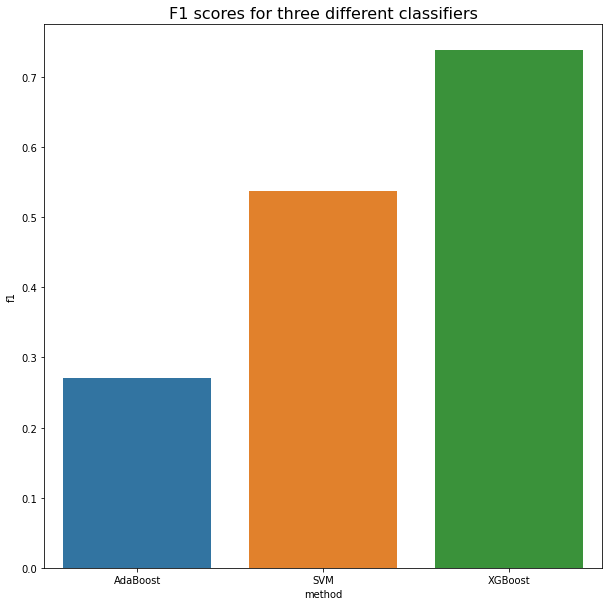

In [12]:
plt.figure(figsize=(10, 10))
sns.barplot(data=results_df, x="method", y="f1")
plt.title("F1 scores for three different classifiers", fontsize=16)
plt.show()

In this very simple experiment, the XGBoost turned out to be the best. Its way to learn basing on gradients of previous classifiers could be decisive.